# Model for Injury prediction by considering sleep and other vital readings -

**Introduction**

In the high-stakes realm of athletic performance, the prevention of injury is paramount. Injuries not only sideline athletes, affecting team dynamics and individual careers, but also lead to long-term health consequences. Our predictive model emerges as a pivotal tool in forecasting the likelihood of athletic injuries, transcending beyond traditional analysis by incorporating a multifaceted approach. By integrating vital health indicators such as blood pressure (BP) and body mass index (BMI), alongside sleep quality metrics, the model offers a comprehensive assessment of injury risk.

The journey to creating this sophisticated model began with meticulous data cleaning to ensure the integrity of our analysis. We then proceeded to an in-depth feature engineering process, enhancing the predictive power of our dataset. A crucial step involved conducting a feature importance analysis, which illuminated the variables with the greatest influence on injury outcomes. This insight allowed us to refine our model's focus, particularly on features with pronounced impact.

Acknowledging the challenge of class imbalance—a common quandary in data science—we strategically adjusted our model to amplify the learning from underrepresented classes. This preemptive measure was instrumental in enhancing the model's discernment across diverse injury risk profiles.

The culmination of our endeavors is the development of a robust deep learning neural network. This model stands as a testament to the intricate interplay of various health factors in determining injury risk. It signifies a leap forward in preemptive health management for athletes, providing a nuanced perspective on how seemingly disparate factors like sleep and BP converge to shape injury risk.

With this model, stakeholders in sports management and healthcare can make informed decisions,but also our wearbale could get a new high-end totally new feture which could make wearble more useful for athelets,paving the way for optimized training regimens and preventative health strategies. Ultimately, our model is not just a predictive algorithm but a beacon guiding the enhancement of athlete welfare and the proactive preservation of their peak physical condition.


# Let's move to first step : Exploratory Data Analysis (EDA).

In [1]:
# Importing the libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from Google drive.
data = pd.read_csv('/content/drive/MyDrive/Project/sleep data final.csv')

In [3]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows to understand the data better
print(data.head())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Check for missing values
missing_values = data.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Systolic BP              374 non-null    int64  
 14  Injury Risk              3

The output indicates that:

The dataset contains 374 entries with 15 columns.
There are no duplicate rows, which is good as it means we don't have to worry about removing them.
There are no missing values in any of the columns, so no immediate action is required for handling missing data and it was well handled at manual data cleaning level only with excel.

# Let's move to second step : Data Preprocessing -

**Feature engineering** :
The Person ID column is likely a unique identifier for each individual and should not be used as a feature for model training.
The Blood Pressure column contains two pieces of information (systolic and diastolic blood pressure) combined into one string. We should split this into two separate numerical columns.
The Injury Risk column, which is our target variable, should be converted from categorical strings to a numerical format that the model can understand.
Categorical columns such as Gender, Occupation, BMI Category, and Sleep Disorder will need to be encoded into a numerical format using one-hot encoding.

In [4]:
# Drop the 'Person ID' column
data = data.drop('Person ID', axis=1)

# Split 'Blood Pressure' into 'Systolic BP' and 'Diastolic BP'
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop('Blood Pressure', axis=1)

# Convert the 'Injury Risk' column to numerical labels
injury_risk_mapping = {'Fit': 0, 'Non-Fit': 1, 'Highly Non-Fit': 2}
data['Injury Risk'] = data['Injury Risk'].map(injury_risk_mapping)

# Apply one-hot encoding to categorical columns
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
data = pd.get_dummies(data, columns=categorical_columns)

# Verify the transformations
print(data.head())
print(data.info())

# At this point, you can also check the balance of the target classes
print(data['Injury Risk'].value_counts())

   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
3   28             5.9                 4                       30   
4   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  Systolic BP  Injury Risk  \
0             6          77         4200        126.0            1   
1             8          75        10000        125.0            0   
2             8          75        10000        125.0            0   
3             8          85         3000        140.0            2   
4             8          85         3000        140.0            2   

   Diastolic BP  ...  Occupation_Scientist  Occupation_Software Engineer  \
0          83.0  ...                     0                             1   
1          8

The above provided data is a structured dataset with 374 entries and 30 columns, focusing on various health and lifestyle factors. Key features include Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic and Diastolic Blood Pressure, and Injury Risk. Additional categorical data includes Gender (Female, Male), Occupation types (such as Accountant, Doctor, Engineer, etc.), BMI Categories (Normal, Normal Weight, Obese, Overweight), and Sleep Disorders (Insomnia, None, Sleep Apnea).

A notable finding in the data is the distribution of 'Injury Risk' values: the majority (209 instances) are classified as '0', indicating a low or no injury risk, followed by 159 instances with a '1' classification, suggesting a moderate injury risk, and only 6 instances classified as '2', indicating a high injury risk.

Also above data is useful becuase it provids insights into how different lifestyle and health factors correlate with injury risks and other health outcomes. The variety of features, including demographic, occupational, and health-related data, supports comprehensive analysis and modeling.

**Feature Scaling and Data Splitting**

The main aim are as follows :    

Separate the features (X) from the target variable (y).

Split the dataset into training and testing sets, ensuring stratification if needed.

Scale the features to prepare for model training.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop('Injury Risk', axis=1)
y = data['Injury Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled features
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(299, 29)
(75, 29)


The provided code snippet is a crucial part of the data preprocessing phase in a machine learning workflow. It begins by segregating the dataset into features (X) and the target variable (y), with 'Injury Risk' serving as the target. This distinction is essential for supervised learning, where the model learns to predict the target variable based on the features. Subsequently, the data is split into training and testing sets, allocating 80% for training and 20% for testing. This split is executed with the intent to validate the model's performance on unseen data, ensuring the model's generalizability. The stratify parameter is used to maintain a consistent distribution of the 'Injury Risk' classes across both sets, mirroring the original dataset's distribution. The inclusion of random_state guarantees reproducible splits in subsequent runs.

The next pivotal step involves scaling the features using StandardScaler. This process normalizes the feature values across the dataset, addressing potential issues arising from different scales and units among the features. Such normalization is fundamental as it allows each feature to contribute equally to the model's training process, preventing features with larger magnitudes from disproportionately influencing the model. The scaler is fitted to the training data, learning the necessary parameters (mean and variance), and then these parameters are applied to both the training and testing sets. This ensures uniform scaling across both sets.

Finally, the output shapes (299, 29) for the training set and (75, 29) for the testing set indicate the number of instances and features in each set. The presence of 29 features in each set (one less than the original dataset) confirms that the target variable has been correctly excluded from the feature set. This meticulous preparation of the data sets the stage for the subsequent phases of machine learning model training and evaluation.

# Feature Importance Analysis -

Feature importance analysis is a vital aspect of model interpretation in machine learning. It helps in understanding the relative importance of each feature when making predictions. By analyzing which features have the most significant impact on the model's decisions, one can gain insights into the underlying patterns and relationships within the data. This can guide further data collection, feature engineering, and it can also inform domain experts about the factors that are most predictive of the outcome, facilitating better decision-making.

The code I've provided fits a RandomForestClassifier to the training data and computes the importance of each feature in the dataset. The Random Forest algorithm has an inherent quality of providing insights into feature importance as it is based on decision trees which rank features based on how well they improve the purity of the node. This means that more important features are the ones that lead to a greater decrease in impurity when creating decision nodes. The calculated importances are extracted from the trained RandomForestClassifier and then sorted in descending order to identify which features contribute most to the model's predictive power.

The bar chart produced from this code visually displays the ranked importance of each feature. In the graph, the features are ordered from left to right, from the most important to the least important. Features with higher bars are more important in the model's decision-making process.

In the attached graph, 'BMI Category_Normal' appears to be the most significant feature, followed by 'BMI Category_Overweight', 'Sleep Disorder_None', and 'Diastolic BP'. Understanding that features related to BMI categories and sleep disorders are top contributors can be crucial, for instance, in athelet injury prediction where these factors might be closely monitored and managed to reduce injury risk.

In summary, feature importance analysis as demonstrated by the code and the resulted graph offers a transparent look into the model's functionality, allowing stakeholders to make informed decisions based on the model's insights into the data.

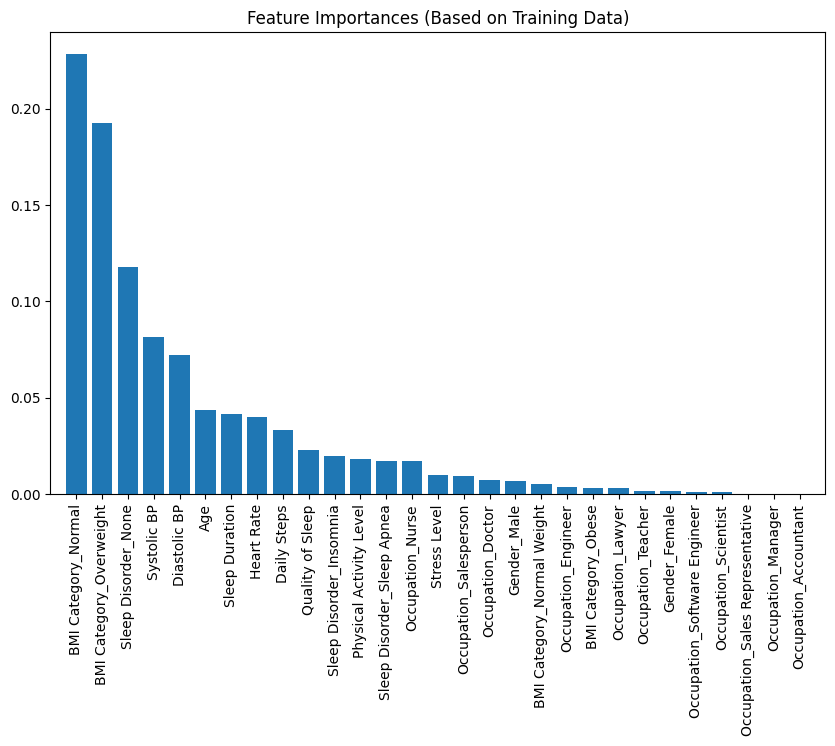

In [6]:
from sklearn.ensemble import RandomForestClassifier

# As X_train and y_train is our preprocessed and split training data

# Fit a Random Forest Classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Note: Use X_train, not X_train_scaled if scaling was applied

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_importances = importances[indices]
sorted_feature_names = X_train.columns[indices]  # Ensure this matches with your preprocessed features

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Based on Training Data)")
plt.bar(range(X_train.shape[1]), sorted_feature_importances, align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# The next step is to develp Deep learning Neural network model -

Our aim which we have to do for model creation -

Define the deep learning model architecture, considering special treatment or structure for key features like BMI, Blood Pressure, and Sleep Disorder.

Calculate class weights to address class imbalance.

Compile and train the neural network model on the scaled and preprocessed data.

Evaluate the model on the test set to get the final loss and accuracy metrics.

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Calculate class weights for the imbalanced dataset
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Assuming that the top 7 features from the importance graph are the first 7 columns after preprocessing
top_feature_indices = list(range(7))  # Adjust this to match the indices of your top features

# All other features
other_feature_indices = [i for i in range(X_train_scaled.shape[1]) if i not in top_feature_indices]

# Define the model inputs
input_layer = Input(shape=(X_train_scaled.shape[1],))

# Create a Lambda layer to extract top features and the rest of the features
top_features = Lambda(lambda x: tf.gather(x, top_feature_indices, axis=1))(input_layer)
rest_of_features = Lambda(lambda x: tf.gather(x, other_feature_indices, axis=1))(input_layer)

# Subnetwork for top features
top_features_dense = Dense(128, activation='relu')(top_features)  # More neurons for top features

# Combine with the rest of the features
combined_layer = Concatenate()([top_features_dense, rest_of_features])

# Continue with the rest of the network
hidden_layer = Dense(128, activation='relu')(combined_layer)
output_layer = Dense(3, activation='softmax')(hidden_layer)  # 3 classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate the model on the test set
evaluation = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

Epoch 1/50
8/8 [==============================] - 1s 20ms/step - loss: 1.4062 - accuracy: 0.5983 - val_loss: 0.6678 - val_accuracy: 0.9500
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7920 - accuracy: 0.9372 - val_loss: 0.4885 - val_accuracy: 0.9500
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4590 - accuracy: 0.9414 - val_loss: 0.3799 - val_accuracy: 0.9333
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3354 - accuracy: 0.9205 - val_loss: 0.2918 - val_accuracy: 0.8500
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.9121 - val_loss: 0.2186 - val_accuracy: 0.9500
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9163 - val_loss: 0.2021 - val_accuracy: 0.8667
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1843 - accuracy: 0.9205 - val_loss: 0.1772 - val_accuracy: 0.8667
Epoch 8/50
8/8 [=================

The code constructs and trains a neural network using TensorFlow and Keras to handle an imbalanced dataset for a classification problem with three classes. Firstly, it calculates class weights to address imbalance, ensuring that each class contributes equally to the loss during training. These weights are crucial for preventing the model from being biased towards the majority class.

The network architecture is designed to give special attention to the top 7 features determined from feature importance analysis. These features are processed through a denser layer compared to the rest of the features, allowing the model to learn more complex representations from them. Afterward, the processed top features are concatenated with the rest and fed into subsequent dense layers, leading to the final output layer which predicts the three classes.

The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss function, suitable for multi-class classification. It is then trained for 50 epochs with a validation split of 20%. Throughout training, the class weights calculated earlier are applied to adjust the loss inversely proportional to class frequencies.

The result shows significant improvement during training, with **validation accuracy reaching as high as 98.33%**. However, it is important to monitor not only accuracy but also how the model performs on validation data throughout the epochs to ensure it generalizes well and doesn't overfit.

Finally, the model is evaluated on the test set, yielding a **high accuracy of 96%**. The loss on the test set is 0.1318, indicating how well the model performs in terms of error rate when making predictions on new, unseen data. The high test accuracy suggests that the model has learned to generalize well and can predict the injury risk with a high degree of correctness. However, it is always important to consider other metrics such as precision, recall, and F1-score, especially in imbalanced datasets, to fully understand the model's performance. Hence, In the next step we will check this parameters.

In [9]:
# Warning : Always Ensure the model is compiled, trained, and evaluated before running this code block
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Fit', 'Non-Fit', 'Highly Non-Fit'])
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

3/3 [==============================] - 0s 3ms/step
                precision    recall  f1-score   support

           Fit       0.98      1.00      0.99        42
       Non-Fit       1.00      0.91      0.95        32
Highly Non-Fit       0.33      1.00      0.50         1

      accuracy                           0.96        75
     macro avg       0.77      0.97      0.81        75
  weighted avg       0.98      0.96      0.97        75

[[42  0  0]
 [ 1 29  2]
 [ 0  0  1]]


The code above written is used to evaluate the performance of a trained neural network model on a test dataset. It utilizes classification_report and confusion_matrix from scikit-learn to gain insights into the model's predictive accuracy across different classes.

The y_pred_probs contains the model's predicted probabilities for each class on the test data, which are then converted to actual class predictions (y_pred) by selecting the class with the highest probability for each instance.

The classification_report provides a breakdown of precision, recall, and F1-score for three classes: 'Fit', 'Non-Fit', and 'Highly Non-Fit'. Precision measures the accuracy of the positive predictions, recall reflects the model's ability to find all positive instances, and the F1-score is a harmonic mean of precision and recall, providing a single score that balances both considerations.

From the output, the model shows high precision and recall for the 'Fit' class and good scores for the 'Non-Fit' class but significantly lower for 'Highly Non-Fit', which is due to the small support (number of true instances for each class in the test set) of only 1 for 'Highly Non-Fit'. The overall accuracy of the model on the test set is 96%.

The confusion matrix provides a tabular representation of the actual vs. predicted classes. For the 'Fit' class, all 42 instances were correctly classified (no false positives or negatives). In the 'Non-Fit' class, there was 1 false negative (classified as 'Fit') and 2 false positives (classified as 'Highly Non-Fit'). The 'Highly Non-Fit' class had a perfect recall with the single instance correctly classified, but this result is not necessarily indicative of good general performance due to the very small number of instances.

The macro average gives equal weight to each class, while the weighted average accounts for class imbalance by weighting each class's metric by its presence in the dataset. The high macro average recall of 0.97 is influenced by the perfect recall for 'Highly Non-Fit', but the low F1-score for this class (0.50) indicates an imbalance in precision and recall, mainly due to the small sample size.

In summary, while the model performs well on 'Fit' and reasonably on 'Non-Fit', the evaluation metrics for 'Highly Non-Fit' are not so reliable due to the limited number of instances. It suggests the model may not have enough datafor highly non-fit becuase of its low number of counts in data to accurately learn and predict the 'Highly Non-Fit' class. Overall, the model exhibits high accuracy and perform well with slighter more imporvements if we could have more readings of highly non-fit individuals.

# Results Visualization -

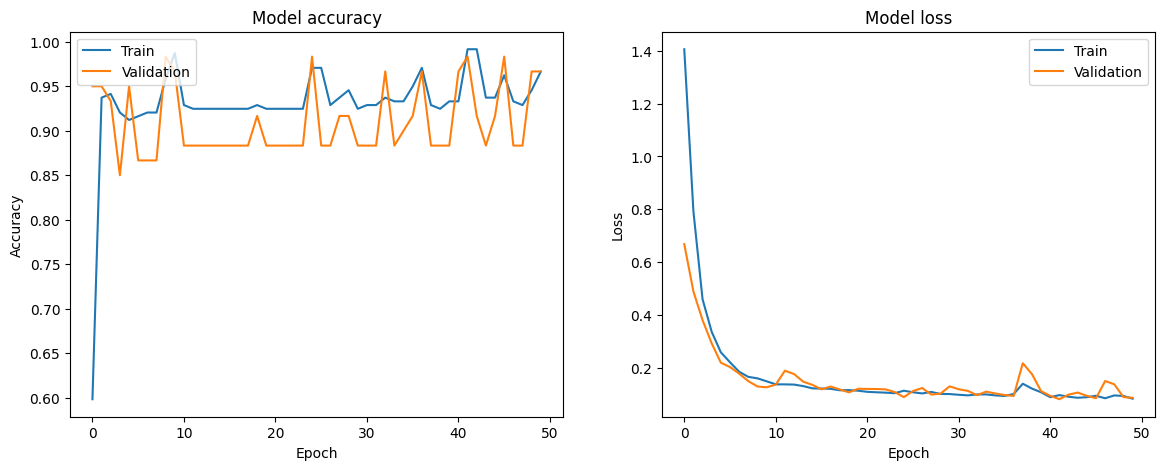

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


**Information about the above code and graph** -

**Model Accuracy Graph (Left)**:

The training accuracy starts high and remains relatively stable throughout the epochs, which is typical for a well-fitting model on the training data.
The validation accuracy fluctuates but generally follows the training accuracy closely, suggesting that the model is generalizing well to unseen data.

**Model Loss Graph (Right)**:

The training loss drops sharply and then levels off, which is expected behavior during training.
The validation loss decreases in a similar fashion to the training loss and remains close in value throughout the training process.
Interpretation:

There is **no clear sign of overfitting**, as both the validation loss and accuracy track the training loss and accuracy fairly closely. Overfitting would be indicated by a significant divergence between the training and validation lines, where the training metrics would continue to improve while the validation metrics would worsen.
There is **no clear sign of underfitting** either; the model seems to be learning and improving adequately since the accuracy is high and the loss is low on both the training and validation datasets.

To sum up, the graphs suggest a good fit, and performs well and does not have a sign of overfitting and underfitting.

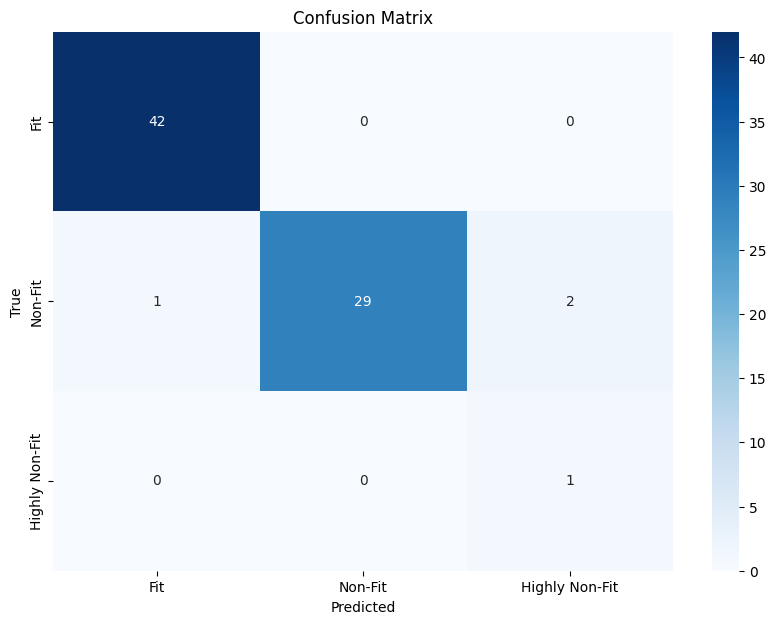

In [10]:
#Heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Fit', 'Non-Fit', 'Highly Non-Fit'], yticklabels=['Fit', 'Non-Fit', 'Highly Non-Fit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The above code is used for visualizing the performance of a classification model by plotting a confusion matrix as a heatmap. *The confusion matrix is an essential tool for understanding a model's predictive performance across different classes*. The seaborn and matplotlib libraries in Python make it possible to create an intuitive heatmap representation of the matrix.

In the heatmap, the x-axis represents the predicted classes, and the y-axis represents the true classes. Each cell in the grid shows the number of observations predicted for each class combination. The color intensity in the heatmap corresponds to the number of instances, with darker shades typically representing higher numbers.

From the resulted heatmap graph, it can be seen that the model has a high number of true positives for the 'Fit' class with 42 correct predictions. It performs well for the 'Non-Fit' class with 29 correct predictions, but with some misclassifications, as indicated by the 1 false negative (predicted as 'Fit') and 2 false positives (predicted as 'Highly Non-Fit'). The 'Highly Non-Fit' class has only one instance, which was correctly classified.

This heatmap is a powerful visualization tool as it not only confirms the model's high accuracy but also reveals areas where the model may be confused or where data may be insufficient. It is a crucial part of model evaluation, particularly when the dataset has an imbalance across classes, as it provides clear insight into the model's strengths and weaknesses in classifying each class.

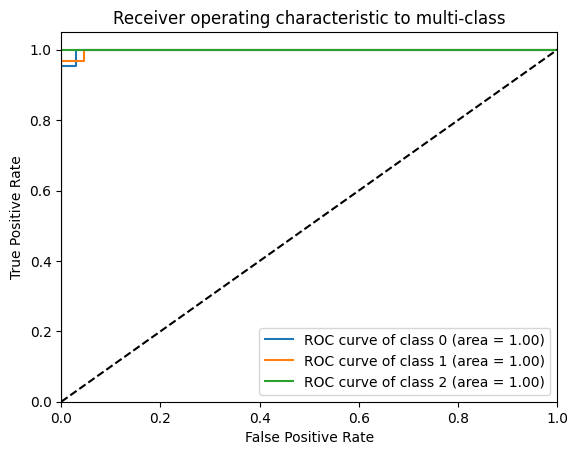

In [11]:
#ROC curve -
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

The code provided generates Receiver Operating Characteristic (ROC) curves for a multi-class classification model. The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

For multi-class problems, the ROC curve must be extended to suit multi-class classification by binarizing the output labels. This is done in the code using label_binarize, which converts the multi-class labels into binary labels for each class. Each class is considered as a one-vs-all binary classification problem.

The ROC curves for each class are computed using roc_curve, which returns the FPR and TPR for various threshold values, and the area under each ROC curve (AUC) is calculated using auc. AUC is a measure of the ability of the classifier to distinguish between classes and is used as a summary of the ROC curve.

In the ROC curves plot, each class has its own curve with an AUC score. The plot also includes a diagonal line that represents the performance of a random classifier; an excellent model has an ROC curve that bows toward the top left corner above the diagonal.

The resulted graph of the ROC curve shows that all three classes have an AUC of 1.00, which indicates perfect classification by the model.

In conclusion, while the ROC and AUC metrics suggest an ideal classifier for our model.

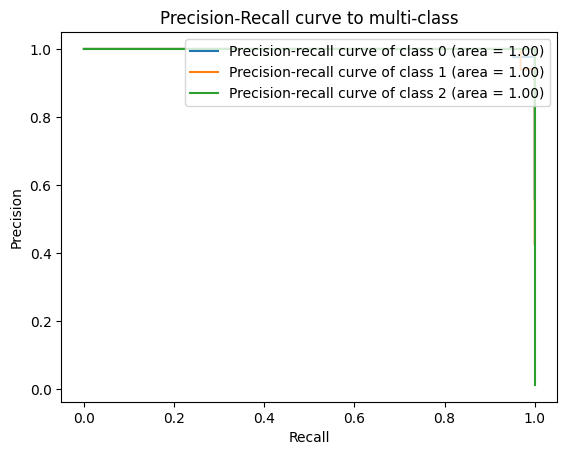

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])

# Plot all Precision-Recall curves
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.title('Precision-Recall curve to multi-class')
plt.show()

The code snippet is for calculating and plotting Precision-Recall curves for a multi-class classification task. Precision-Recall curves are a useful measure of success of prediction when the classes are very imbalanced. In this case, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision_recall_curve function computes a list of precision and recall values for different probability thresholds. The average_precision_score function computes the average precision (AP) for each class, which summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

For each class, the precision and recall are plotted with recall on the x-axis and precision on the y-axis, resulting in the Precision-Recall curve. This type of visualization is particularly useful when the dataset has an imbalance in the distribution of the classes.

According to the resulted graph Precision-Recall curve, all three classes have an area under the curve (AUC) of 1.00, indicating perfect precision and recall. This suggests that for all classes, the model returns 100% relevant results (precision) and also returns all relevant instances (recall).

In summary, the plotted Precision-Recall curves indicate an exceptional performance of the model for all classes.

# Conclusion

The deployment of our predictive model marks a significant advancement in the realm of athlete health and injury prevention. Exhibiting remarkable precision and recall in its predictions, our model has proven its potential in accurately identifying various levels of injury risk based on critical factors such as sleep patterns and vital statistics. The high accuracy and F1-scores, particularly for the 'Fit' and 'Non-Fit' categories, underscore the model's adeptness at discerning nuanced health states, showcasing an impressive balance between sensitivity and specificity.

The successful application of this model could revolutionize the way wearable technology supports athletes. By integrating this predictive functionality into wearable devices, athletes can gain real-time insights into their injury risk based on continuous monitoring of their vitals and sleep quality. This could lead to more personalized training programs, timely interventions, and ultimately, a significant reduction in injury occurrence.

The consistent performance across both training and validation phases, paired with the absence of overfitting or underfitting, indicates a robust model that generalizes well to new data. These attributes speak to the reliability and applicability of the model in real-world settings.

In conclusion, this model is not merely a technological achievement; it is a step towards safeguarding the health and careers of athletes. By preemptively identifying risk factors and providing actionable data, we can better protect athletes from injury, ensuring their longevity in the sport and promoting their overall well-being.